In [1]:
from sklearn.datasets.samples_generator import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# prepare train and test dataset
def prepare_data():
    
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [3]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
    
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    opt = SGD(lr=0.01, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

    # plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('momentum='+str(momentum), pad=-80)

In [4]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()

In [5]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]

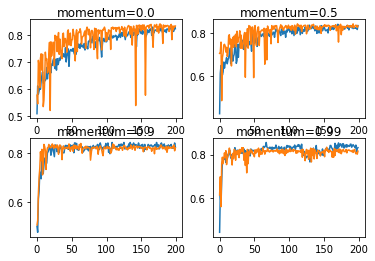

In [6]:
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 220 + (i+1)
    pyplot.subplot(plot_no)
    # fit model and plot learning curves for a momentum
    fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.show()

In [ ]:
'''We can see that the addition of momentum does accelerate the training of the model.
Specifically, momentum values of 0.9 and 0.99 achieve reasonable train and test accuracy within
about 50 training epochs as opposed to 200 training epochs when momentum is not used. In all
cases where momentum is used, the accuracy of the model on the holdout test dataset appears
to be more stable, showing less volatility over the training epochs.'''